# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os
from urllib.request import urlretrieve

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1990 et se termine avec une semaine récente.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

Pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [3]:
data_file = 'varicelle.csv' 
if not os.path.exists(data_file):
    urlretrieve(data_url, data_file)

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [4]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202533          7   2020      249    3791       3           0   
1     202532          7   2015       42    3988       3           0   
2     202531          7   5703        0   13082       9           0   
3     202530          7   7102     3590   10614      11           6   
4     202529          7   6385     3384    9386      10           6   
5     202528          7   5584     3123    8045       8           4   
6     202527          7   5667     2850    8484       8           4   
7     202526          7   5872     3285    8459       9           5   
8     202525          7   5953     3698    8208       9           6   
9     202524          7   4580     2558    6602       7           4   
10    202523          7   4911     2663    7159       7           4   
11    202522          7   6837     3940    9734      10           6   
12    202521          7   4693     2653    6733       7           4   
13    202520          7   3083     1535    4631       5           3   
14    202519          7   5084     1997    8171       8           3   
15    202518          7   5003     2718    7288       7           4   
16    202517          7   6246     3424    9068       9           5   
17    202516          7   6151     3193    9109       9           5   
18    202515          7   5557     3262    7852       8           5   
19    202514          7   4984     2858    7110       7           4   
20    202513          7   5964     3608    8320       9           5   
21    202512          7   3855     1995    5715       6           3   
22    202511          7   5878     2747    9009       9           4   
23    202510          7   2921     1421    4421       4           2   
24    202509          7   3381     1468    5294       5           2   
25    202508          7   2835     1286    4384       4           2   
26    202507          7   4502     2382    6622       7           4   
27    202506          7   3455     1958    4952       5           3   
28    202505          7   2087     1056    3118       3           1   
29    202504          7   6895     4466    9324      10           6   
...      ...        ...    ...      ...     ...     ...         ...   
1781  199126          7  17608    11304   23912      31          20   
1782  199125          7  16169    10700   21638      28          18   
1783  199124          7  16171    10071   22271      28          17   
1784  199123          7  11947     7671   16223      21          13   
1785  199122          7  15452     9953   20951      27          17   
1786  199121          7  14903     8975   20831      26          16   
1787  199120          7  19053    12742   25364      34          23   
1788  199119          7  16739    11246   22232      29          19   
1789  199118          7  21385    13882   28888      38          25   
1790  199117          7  13462     8877   18047      24          16   
1791  199116          7  14857    10068   19646      26          18   
1792  199115          7  13975     9781   18169      25          18   
1793  199114          7  12265     7684   16846      22          14   
1794  199113          7   9567     6041   13093      17          11   
1795  199112          7  10864     7331   14397      19          13   
1796  199111          7  15574    11184   19964      27          19   
1797  199110          7  16643    11372   21914      29          20   
1798  199109          7  13741     8780   18702      24          15   
1799  199108          7  13289     8813   17765      23          15   
1800  199107          7  12337     8077   16597      22          15   
1801  199106          7  10877     7013   14741      19          12   
1802  199105          7  10442     6544   14340      18          11   
1803  199104          7   7913     4563   11263      14           8   
1804  199103          7  15387    10484   20290      27          18   
1805  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Non.

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

On se protège contre les NaN

In [6]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202533          7   2020      249    3791       3           0   
1     202532          7   2015       42    3988       3           0   
2     202531          7   5703        0   13082       9           0   
3     202530          7   7102     3590   10614      11           6   
4     202529          7   6385     3384    9386      10           6   
5     202528          7   5584     3123    8045       8           4   
6     202527          7   5667     2850    8484       8           4   
7     202526          7   5872     3285    8459       9           5   
8     202525          7   5953     3698    8208       9           6   
9     202524          7   4580     2558    6602       7           4   
10    202523          7   4911     2663    7159       7           4   
11    202522          7   6837     3940    9734      10           6   
12    202521          7   4693     2653    6733       7           4   
13    202520          7   3083     1535    4631       5           3   
14    202519          7   5084     1997    8171       8           3   
15    202518          7   5003     2718    7288       7           4   
16    202517          7   6246     3424    9068       9           5   
17    202516          7   6151     3193    9109       9           5   
18    202515          7   5557     3262    7852       8           5   
19    202514          7   4984     2858    7110       7           4   
20    202513          7   5964     3608    8320       9           5   
21    202512          7   3855     1995    5715       6           3   
22    202511          7   5878     2747    9009       9           4   
23    202510          7   2921     1421    4421       4           2   
24    202509          7   3381     1468    5294       5           2   
25    202508          7   2835     1286    4384       4           2   
26    202507          7   4502     2382    6622       7           4   
27    202506          7   3455     1958    4952       5           3   
28    202505          7   2087     1056    3118       3           1   
29    202504          7   6895     4466    9324      10           6   
...      ...        ...    ...      ...     ...     ...         ...   
1781  199126          7  17608    11304   23912      31          20   
1782  199125          7  16169    10700   21638      28          18   
1783  199124          7  16171    10071   22271      28          17   
1784  199123          7  11947     7671   16223      21          13   
1785  199122          7  15452     9953   20951      27          17   
1786  199121          7  14903     8975   20831      26          16   
1787  199120          7  19053    12742   25364      34          23   
1788  199119          7  16739    11246   22232      29          19   
1789  199118          7  21385    13882   28888      38          25   
1790  199117          7  13462     8877   18047      24          16   
1791  199116          7  14857    10068   19646      26          18   
1792  199115          7  13975     9781   18169      25          18   
1793  199114          7  12265     7684   16846      22          14   
1794  199113          7   9567     6041   13093      17          11   
1795  199112          7  10864     7331   14397      19          13   
1796  199111          7  15574    11184   19964      27          19   
1797  199110          7  16643    11372   21914      29          20   
1798  199109          7  13741     8780   18702      24          15   
1799  199108          7  13289     8813   17765      23          15   
1800  199107          7  12337     8077   16597      22          15   
1801  199106          7  10877     7013   14741      19          12   
1802  199105          7  10442     6544   14340      18          11   
1803  199104          7   7913     4563   11263      14           8   
1804  199103          7  15387    10484   20290      27          18   
1805  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [8]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste.

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

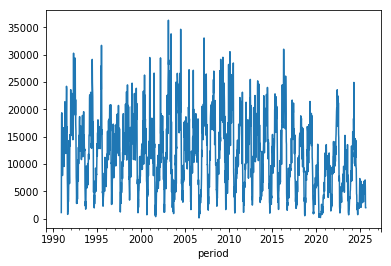

In [10]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

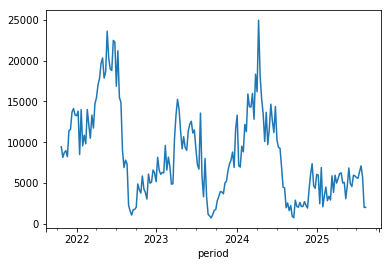

In [11]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de la varicelle est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent en décembre 1990, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [12]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [13]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

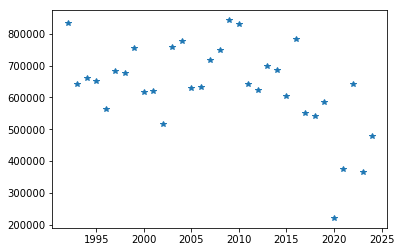

In [14]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [15]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2024    479258
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu quatre au cours des 35 dernières années.

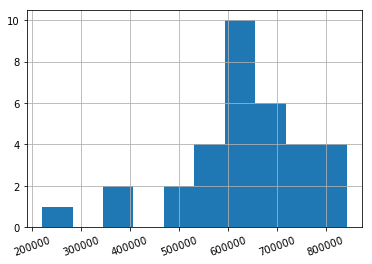

In [16]:
yearly_incidence.hist(xrot=20)